In [199]:
import pandas as pd
import numpy as np

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import calibration_curve

nltk.download('wordnet')  
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/yben409/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yben409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
lemmatizer = WordNetLemmatizer()

def remove_stop_words(text):
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return clean_text

def tokenize_text(text):
    return nltk.word_tokenize(text)

def lemmatize_sentence(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_sentence = ' '.join(lemmatized_tokens)
    return lemmatized_sentence

In [206]:
dataset = pd.read_csv('../../Suicide/Clean Dataset.csv')
dataset['class'] = dataset['class'].replace({'suicide':1,'non-suicide':0})
dataset

,Unnamed: 0.1,Unnamed: 0,text,class
0,0,2,ex wife threatening suiciderecently left wife ...,1
1,1,3,weird dont get affected compliment coming some...,0
2,2,4,finally 2020 almost never hear 2020 bad year e...,0
3,3,8,need helpjust help im cry hard,1
4,4,9,im losthello name adam 16 ive struggling year ...,1
...,...,...,...,...
232069,232069,348103,dont like rock going get anything go httpsmusi...,0
232070,232070,348106,tell many friend lonely everything deprived pr...,0
232071,232071,348107,pee probably taste like salty tea someone dran...,0
232072,232072,348108,usual stuff find hereim posting sympathy pity ...,1


In [207]:
dataset[dataset['text'].isnull()].index

Index([   408,   9592,  11476,  20544,  21188,  25293,  26469,  35823,  47558,
        48923,  55136,  77776,  81678, 100144, 102482, 106269, 119023, 119820,
       125343, 126125, 131489, 137872, 178192, 181086, 181731, 200265, 204433,
       205215, 207446, 210846, 216154, 231259],
      dtype='int64')

In [208]:
dataset.dropna(inplace=True)
dataset[dataset['text'].isnull()].index

Index([], dtype='int64')

In [209]:
yes_df = dataset[dataset['class'] == 1]
no_df = dataset[dataset['class'] == 0]

yes_df = yes_df.sample(frac=1, random_state=1)
no_df = no_df.sample(frac=1, random_state=1)

yes_df = yes_df[:30000]
no_df = no_df[:30000]

balanced_dataset = pd.concat([yes_df, no_df])
balanced_dataset = balanced_dataset.sample(frac=1, random_state=2)

balanced_dataset

,Unnamed: 0.1,Unnamed: 0,text,class
18256,18256,27491,really freaking tonight past issue constant an...,1
177367,177367,266204,im running timeand everyone leaving one left l...,1
47124,47124,70584,need helpmy depression started around 3 month ...,1
54776,54776,82123,please soonim nothing shell loved music loved ...,1
228044,228044,342005,feel like ungrateful asshole dad think he kind...,0
...,...,...,...,...
180230,180230,270482,best game 2020 go game thr filler filler fille...,0
9569,9569,14374,give homework right seriously,0
119543,119543,179651,trust fundso ive thinking lately many fellow l...,1
146887,146887,220427,want hug go bud ʖ,0


In [210]:
# Models
import pickle

model_depression = pickle.load(open('../../Depression/rf_classifier.pkl', 'rb'))
model_anxiety = pickle.load(open('../../Anxiety/models/split 4/Voting_classifier_4.pkl', 'rb'))

In [211]:
# TF IDF Vectorizers
depression_vectorizer = pickle.load(open('../../Depression/grid_search_50000_tfidf.pkl', 'rb'))
anxiety_vectorizer = pickle.load(open('../../Anxiety/models/split 4/grid_search_5000_tfidf.pkl', 'rb'))

In [212]:
len(balanced_dataset[balanced_dataset['text'].isnull()].index)

0

In [213]:
X = balanced_dataset['text']

In [214]:
X_depression_vectorized = depression_vectorizer.transform(X)
X_anxiety_vectorized = anxiety_vectorizer.transform(X)

In [215]:
X_depression_vectorized_dense = X_depression_vectorized.toarray()
X_anxiety_vectorized_dense = X_anxiety_vectorized.toarray()
X_anxiety_vectorized_dense

array([[0.        , 0.        , 0.06599192, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [216]:
is_depression = model_depression.predict(X_depression_vectorized_dense) 
len(is_depression)

In [3]:
is_depression

NameError: name 'is_depression' is not defined

In [ ]:
is_anxious = model_anxiety.predict(X_anxiety_vectorized_dense) 

In [ ]:
is_anxious

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(pd.Series(is_depression).value_counts())
print(pd.Series(is_anxious).value_counts())
print(balanced_dataset['class'].value_counts())

1    40198
0    19802
Name: count, dtype: int64
0    43942
4    16058
Name: count, dtype: int64
class
1    30000
0    30000
Name: count, dtype: int64


In [ ]:
is_anxious = np.array([1 if element == 4 else element for element in is_anxious])

In [ ]:
is_anxious = pd.Series(is_anxious)
is_depression = pd.Series(is_depression)

In [ ]:
print(is_anxious.isnull().sum())
print(is_anxious.isna().sum())

0
0


In [ ]:
print(is_depression.isnull().sum())
print(is_depression.isna().sum())

0
0


In [ ]:
columns_to_drop = [0, 1] 
balanced_dataset.drop(balanced_dataset.columns[columns_to_drop], axis=1, inplace=True)

In [ ]:
is_anxious.name = 'is_anxious'
is_depression.name = 'is_depression'

In [ ]:
balanced_dataset = balanced_dataset.reset_index(drop=True)  
is_anxious = is_anxious.reset_index(drop=True) 
is_depression = is_depression.reset_index(drop=True) 
result_df = pd.concat([balanced_dataset, is_anxious, is_depression], axis=1)

In [ ]:
result_df

,text,class,is_anxious,is_depression
0,really freaking tonight past issue constant an...,1,0,1
1,im running timeand everyone leaving one left l...,1,0,1
2,need helpmy depression started around 3 month ...,1,0,1
3,please soonim nothing shell loved music loved ...,1,0,1
4,feel like ungrateful asshole dad think he kind...,0,0,1
...,...,...,...,...
59995,best game 2020 go game thr filler filler fille...,0,0,0
59996,give homework right seriously,0,0,0
59997,trust fundso ive thinking lately many fellow l...,1,0,1
59998,want hug go bud ʖ,0,0,0


In [ ]:
print(len(result_df[result_df['is_anxious'].isna()].index))
print(len(result_df[result_df['is_depression'].isna()].index))

0
0


In [ ]:
X = result_df.iloc[:,0].values
y = result_df.iloc[:,1:].values

In [ ]:
y[0]

array([1, 0, 1])

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_train)

NameError: name 'X' is not defined

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

max_features_values = [15000, 20000, 30000]

tfidf_vectorizer = TfidfVectorizer()
 
param_grid = {
    'max_features': max_features_values,
}

grid_search = GridSearchCV(tfidf_vectorizer, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_max_features = grid_search.best_params_['max_features']

print(f"Best max_features: {best_max_features}")

best_tfidf_vectorizer = grid_search.best_estimator_

/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/yben409/opt/anaconda3/lib/python3

Best max_features: 15000


In [163]:
pickle.dump(best_tfidf_vectorizer, open('grid_search_15000_tfidf.pkl', 'wb'))

In [164]:
X_train_tfidf = best_tfidf_vectorizer.transform(X_train)
X_test_tfidf = best_tfidf_vectorizer.transform(X_test)

num_train_samples, _ = X_train_tfidf.shape
num_test_samples, _ = X_test_tfidf.shape

print(f"Number of training samples: {num_train_samples}")
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 48000
Number of test samples: 12000


In [165]:
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [166]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.multioutput import MultiOutputClassifier

nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting='soft')

multi_output_voting_clf = MultiOutputClassifier(estimator=VotingClassifiers)

multi_output_voting_clf.fit(X_train_dense, y_train)

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('GaussianNB',
                                                              GaussianNB()),
                                                             ('BernoulliNB',
                                                              BernoulliNB()),
                                                             ('MultinomialNB',
                                                              MultinomialNB())],
                                                 voting='soft'))

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pickle

rf = RandomForestClassifier(n_estimators=40, random_state=42)

multi_output_rf = MultiOutputClassifier(estimator=rf)

multi_output_rf.fit(X_train_dense, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=40,
                                                       random_state=42))

In [180]:
y_pred_rf = multi_output_rf.predict(X_test_dense)
y_pred_voting = multi_output_voting_clf.predict(X_test_dense)

In [181]:
y_pred_rf, y_test

(array([[0, 0, 1],
        [0, 0, 0],
        [1, 0, 1],
        ...,
        [0, 0, 1],
        [1, 0, 1],
        [0, 0, 1]]),
 array([[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
        ...,
        [1, 0, 1],
        [1, 0, 1],
        [0, 0, 1]]))

Precision: 0.78
Recall: 0.77
F1-Score: 0.78


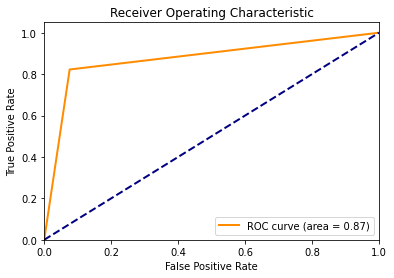

In [183]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred_voting, average='micro')
recall = recall_score(y_test, y_pred_voting, average='micro')
f1 = f1_score(y_test, y_pred_voting, average='micro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

roc_auc_scores = []
for i in range(y_test.shape[1]):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_voting[:, i])
    roc_auc_scores.append(roc_auc)

fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred_voting[:, 0])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scores[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Precision: 0.89
Recall: 0.85
F1-Score: 0.87


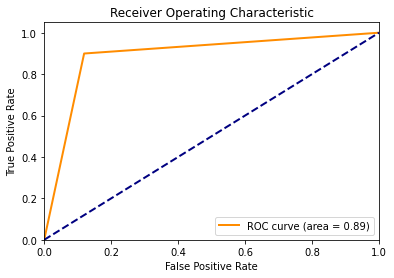

In [182]:
precision = precision_score(y_test, y_pred_rf, average='micro')
recall = recall_score(y_test, y_pred_rf, average='micro')
f1 = f1_score(y_test, y_pred_rf, average='micro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

roc_auc_scores = []
for i in range(y_test.shape[1]):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_rf[:, i])
    roc_auc_scores.append(roc_auc)

fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred_rf[:, 0])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scores[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# multi_output_rf is the best model here ! 

In [198]:
pickle.dump(multi_output_rf, open('multi_output_rf.pkl', 'wb'))
pickle.dump(multi_output_rf, open('../multi_output_rf.pkl', 'wb'))

In [184]:
def preprocess(element):
    element = element.lower() #convert to lower case 
    element = element.replace(r'[^\w\s]+', '') #remove punctuations
    element = [word for word in element.split() if word not in (stop_words)] #tokenize the sentence
    element = ' '.join([lemmatizer.lemmatize(i) for i in element]) #lemmatizing
    inputToModel = best_tfidf_vectorizer.transform([element]).toarray() #transform to vector form
    return inputToModel

In [185]:
def predict_voting(input_text):
    print('Input : ',input_text) 
    processed_array = preprocess(input_text) 
    predict = multi_output_rf.predict(processed_array) #Model prediction
    print(predict)